<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/RegressionCorrelation/VariousRegressionsExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Various Types of Regressions in R: Class exercise

This is an exercise we did in class about various types of regressions, and the possible pitfalls of fitting in different ranges when dealing with extrapolation or interpolation. 

# Part 1: First set of data (short range)

Load, data exploration to see what we've got, we graph and it is somewhat like a linear. Therefore, we will fit a line with $lm$. 

In [80]:
h1 <- read.csv('rangocorto.csv',sep=';')

In [81]:
str(h1)

'data.frame':	10 obs. of  2 variables:
 $ Xi: int  10 11 12 13 14 15 16 17 18 19
 $ Yi: num  44.3 49.6 61.5 67.8 80.4 ...


In [82]:
summary(h1)

       Xi              Yi        
 Min.   :10.00   Min.   : 44.35  
 1st Qu.:12.25   1st Qu.: 63.08  
 Median :14.50   Median : 83.74  
 Mean   :14.50   Mean   : 84.36  
 3rd Qu.:16.75   3rd Qu.:105.35  
 Max.   :19.00   Max.   :125.67  

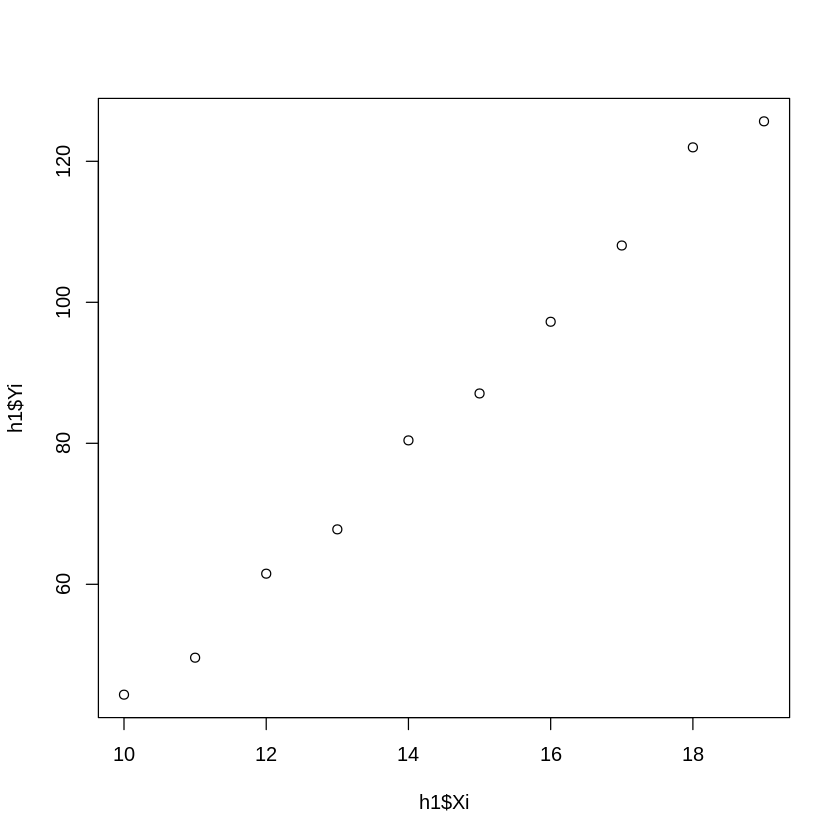

In [83]:
plot(h1$Xi,h1$Yi)

In [84]:
linear_1 <- lm(data=h1,formula=Yi ~ Xi) #fitting in itself

In [85]:
linear_1$coefficients #model coefficients

(Intercept)          Xi 
 -53.280917    9.492786

In [86]:
summary(linear_1)


Call:
lm(formula = Yi ~ Xi, data = h1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3332 -1.5170 -0.7040  0.8537  4.3848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -53.2809     3.8077  -13.99 6.60e-07 ***
Xi            9.4928     0.2576   36.85 3.22e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.34 on 8 degrees of freedom
Multiple R-squared:  0.9941,	Adjusted R-squared:  0.9934 
F-statistic:  1358 on 1 and 8 DF,  p-value: 3.224e-10


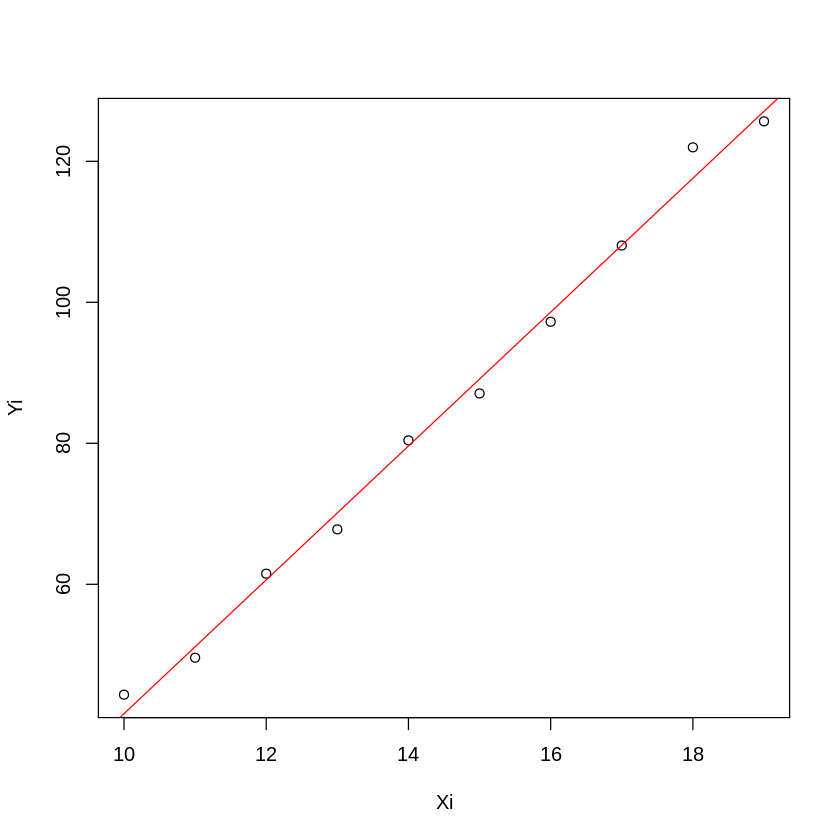

In [87]:
#plot of the data and the corresponding line
plot(h1$Xi,h1$Yi,xlab='Xi',ylab='Yi')
abline(linear_1,col='red')

This seems to make for a good fit visually. Right now, we will introduce the residuals, which are the errors our fit makes with respect to the data. We can plot them as a function of the independent variable, as well as using a histogram plot. 

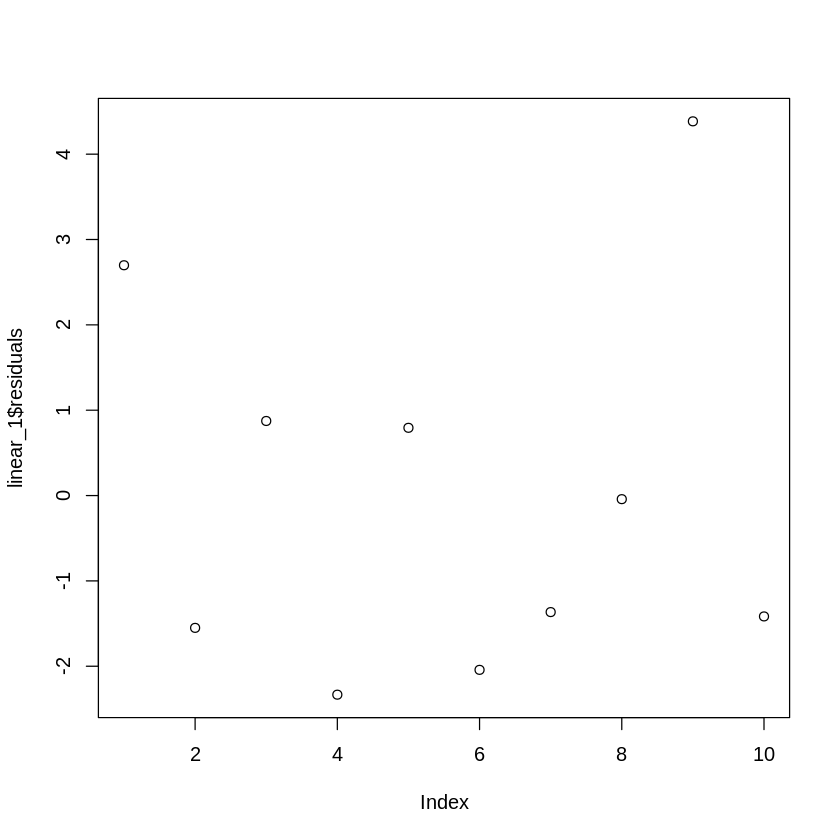

In [88]:
plot(linear_1$residuals)

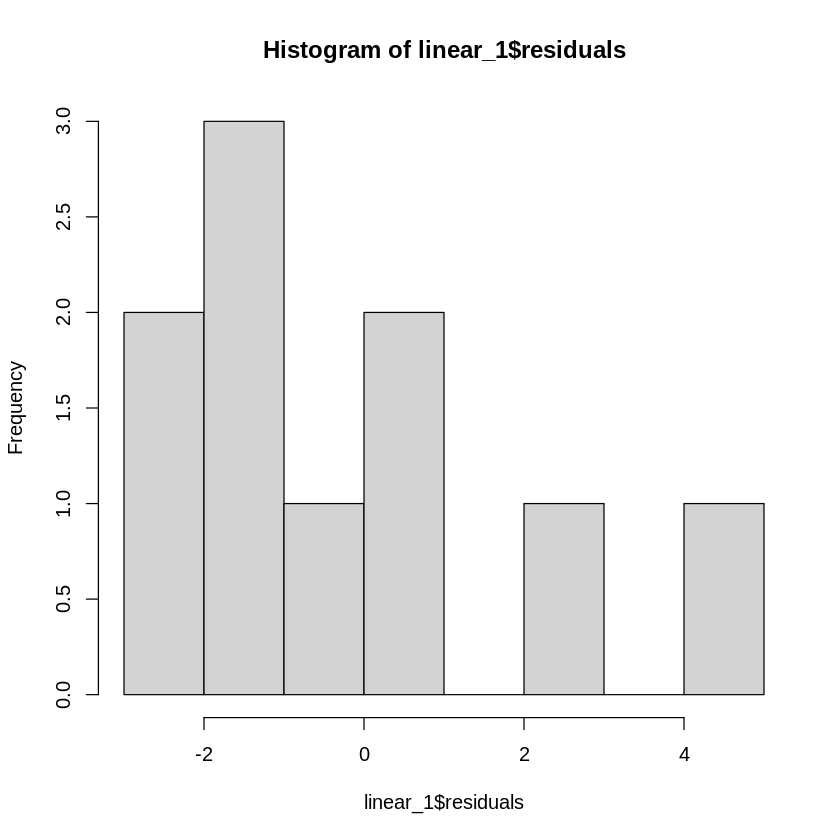

In [89]:
hist(linear_1$residuals)

# Part 2: second set of data (medium central range)

Data from another range but same source as the first dataset

In [90]:
h2 <- read.csv('rangomediocentral.csv',sep=';')

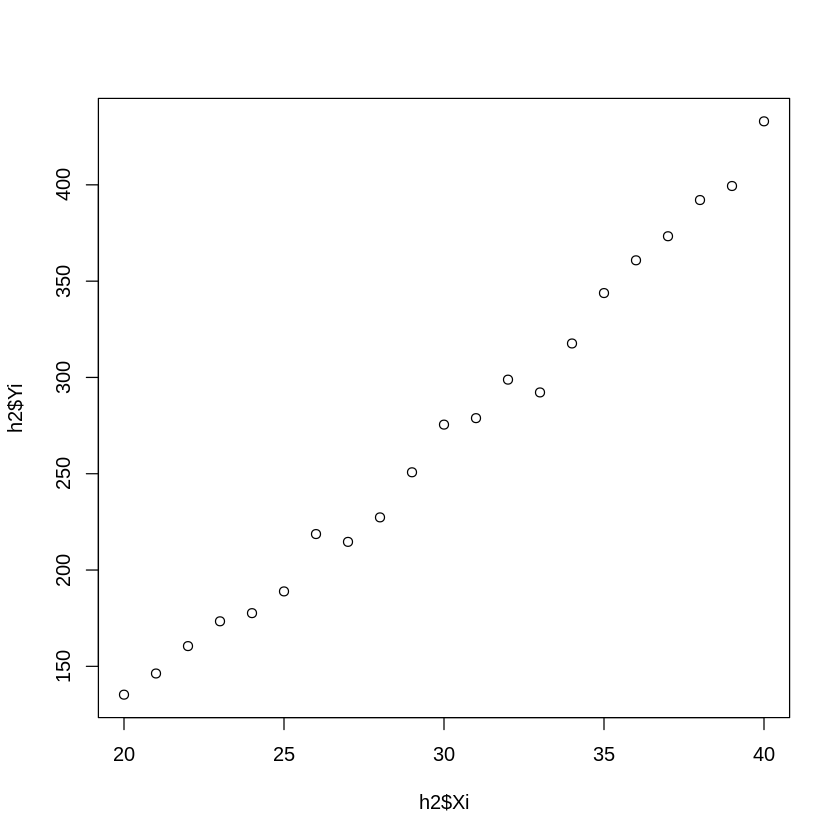

In [91]:
plot(h2$Xi,h2$Yi)

We will then try to fit a linear model again, because the appeance tells us it could be a linear function, as well as repeating the analysis from before, having in mind that these data new follow our last set. We have that:
- coefficient are way different
- pearson $R^2$ value is smaller
- visually kind of okay
- residuals seem a bit biased

In [92]:
linear_2 <- lm(data=h2,formula=Yi ~ Xi) #fitting in itself

In [93]:
linear_2$coefficients #model coefficients

(Intercept)          Xi 
  -166.1491     14.5207

In [94]:
summary(linear_2)


Call:
lm(formula = Yi ~ Xi, data = h2)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.816  -5.128   1.738   6.479  18.300 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -166.1491    10.4734  -15.86 2.05e-12 ***
Xi            14.5207     0.3422   42.43  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.496 on 19 degrees of freedom
Multiple R-squared:  0.9896,	Adjusted R-squared:  0.989 
F-statistic:  1800 on 1 and 19 DF,  p-value: < 2.2e-16


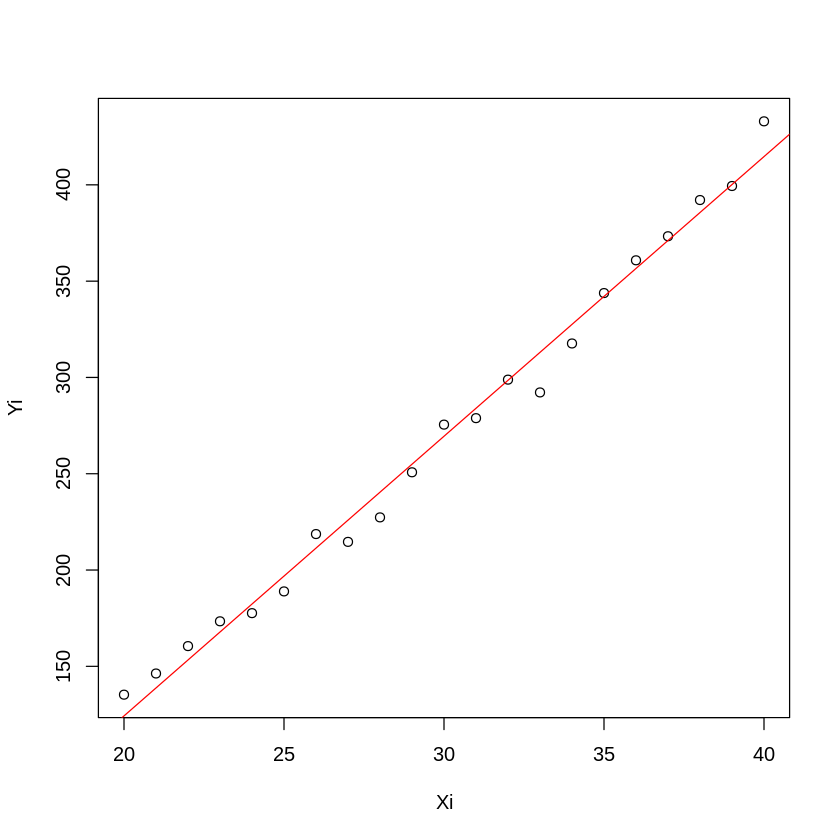

In [95]:
#plot of the data and the corresponding line
plot(h2$Xi,h2$Yi,xlab='Xi',ylab='Yi')
abline(linear_2,col='red')

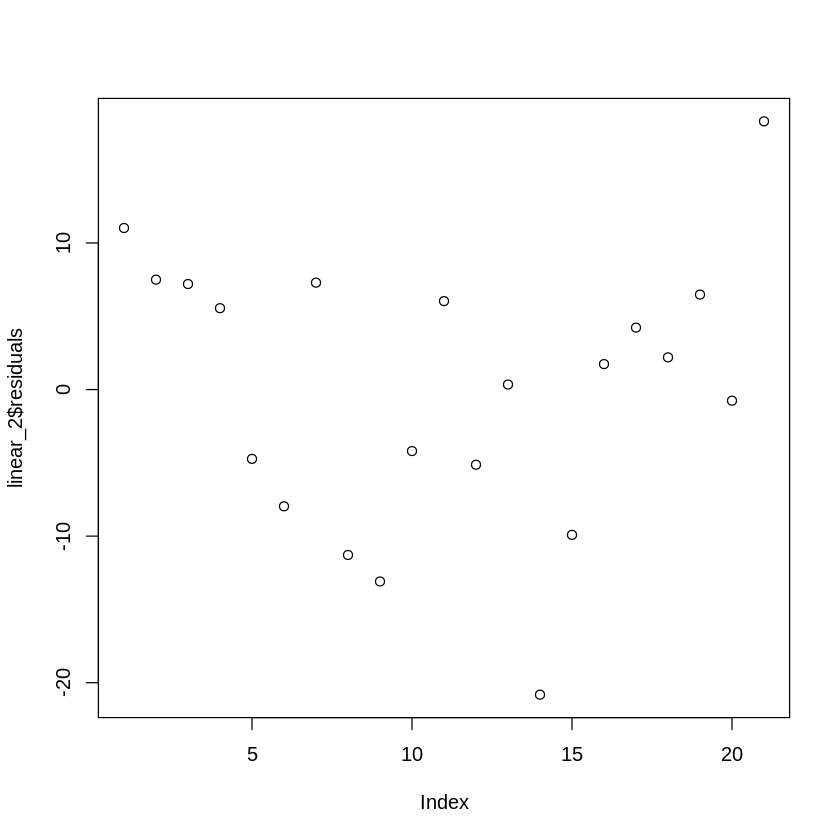

In [96]:
plot(linear_2$residuals)

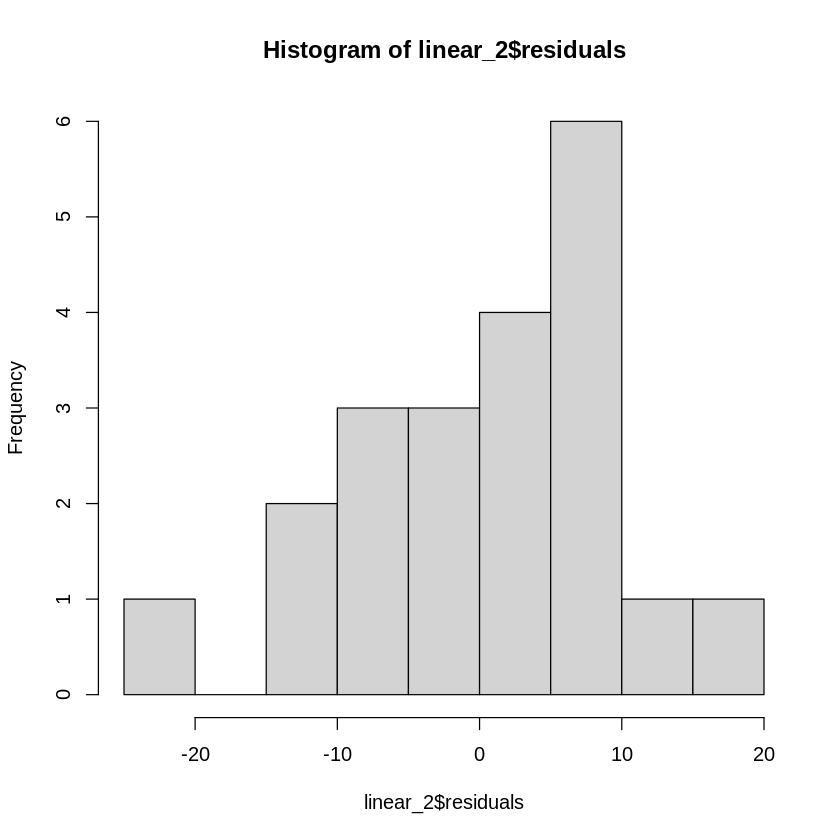

In [97]:
hist(linear_2$residuals)

# Part 3: getting both datasets together 

We unite both datasets, and we get a wider data range. From initial plot, it doesn't look as linear as before. 

In [98]:
h3 <- rbind(h1,h2)

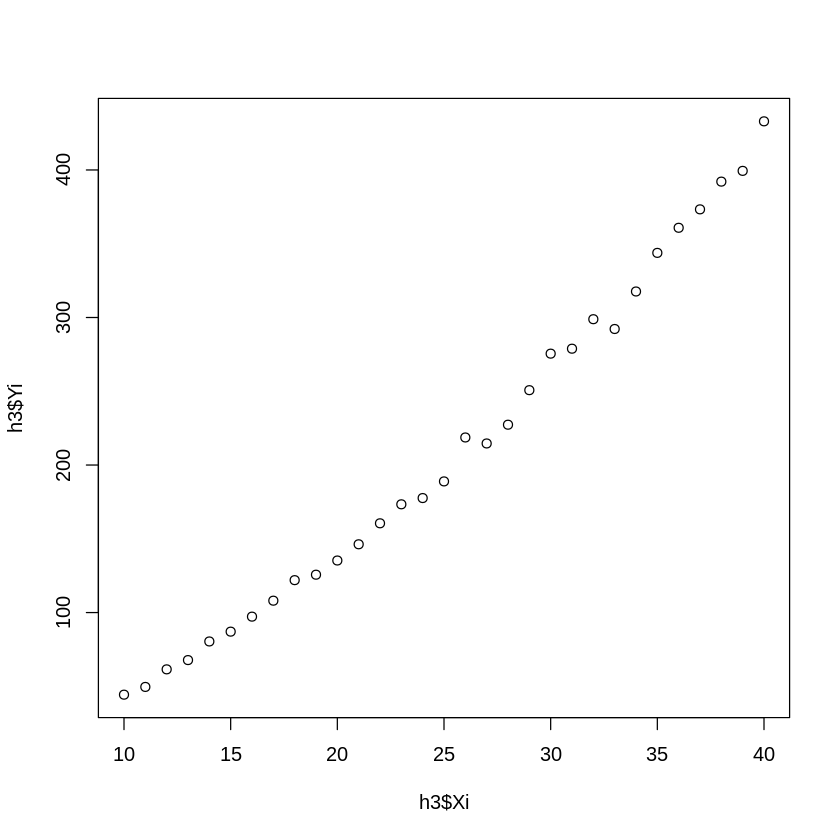

In [99]:
plot(h3$Xi,h3$Yi)

Now let's plot the two very different linear models we got from before. We see that we have two very different lines, as if both datasets followed different models, maybe. Or maybe it is actually a completely different set of rules followed by our data. 

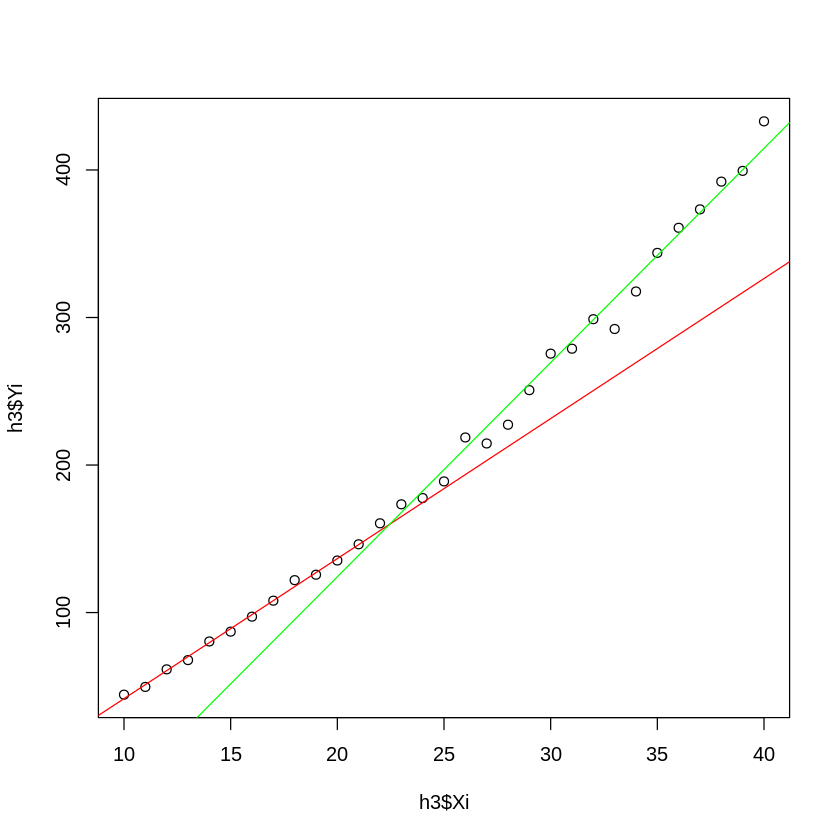

In [100]:
plot(h3$Xi,h3$Yi)
abline(linear_1,col='red')
abline(linear_2,col='green')

We can fit a new line to all of our data. There, we will see that this line has a nice $R^2$ and the error histogram is kinda nice, but it performs worse visually. Nevertheless, the one thing we can't ignore is a completely biased residuals plot, where a tendence is observed. 

In [101]:
linear_3 <- lm(data=h3,formula=Yi ~ Xi) #fitting in itself

In [102]:
linear_3$coefficients #model coefficients

(Intercept)          Xi 
 -106.77622    12.66144

In [103]:
summary(linear_3)


Call:
lm(formula = Yi ~ Xi, data = h3)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.856 -11.111   0.467  10.794  33.297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -106.776      7.726  -13.82 2.72e-14 ***
Xi            12.661      0.291   43.52  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.49 on 29 degrees of freedom
Multiple R-squared:  0.9849,	Adjusted R-squared:  0.9844 
F-statistic:  1894 on 1 and 29 DF,  p-value: < 2.2e-16


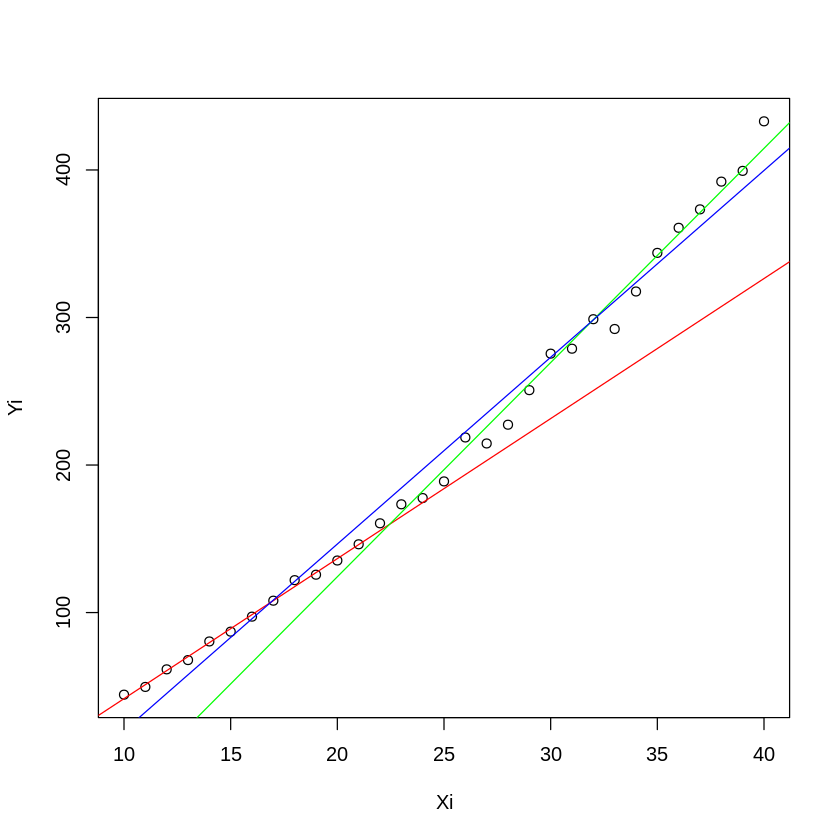

In [104]:
#plot of the data and the corresponding line
plot(h3$Xi,h3$Yi,xlab='Xi',ylab='Yi')
abline(linear_1,col='red')
abline(linear_2,col='green')
abline(linear_3,col='blue')

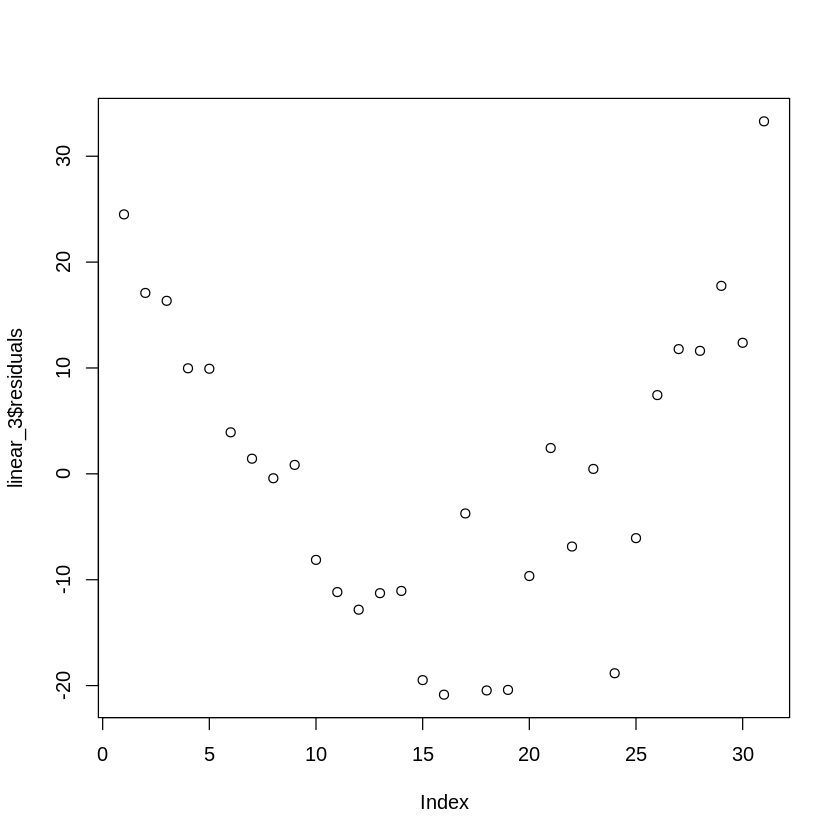

In [105]:
plot(linear_3$residuals)

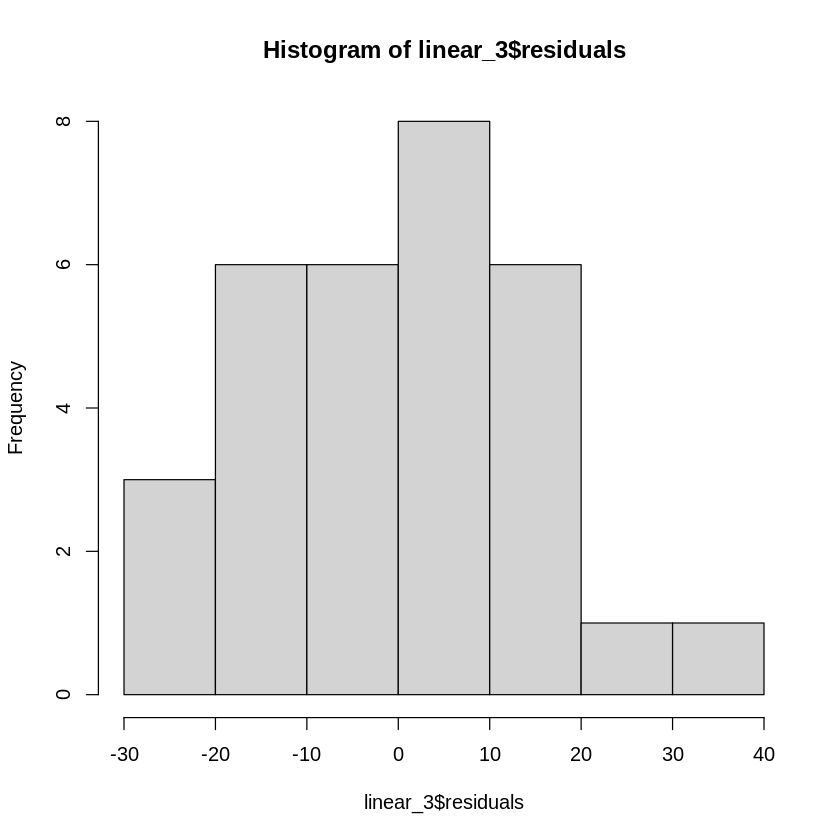

In [106]:
hist(linear_3$residuals)

# Part 4: trying to use a parabolic fit

We will do a parabolic/quadratic fitting for this dataset. Nevertheless we have to bear in mind that, in real life, we just don't fit without any reason. Rather, there should be an underlying reason for us to decide to fit with certain functional forms (maybe a model, like in physics, or a strong intuition). Let us define and fit our model, after these considerations. 

In [107]:
par1 <- lm(data=h3,formula='Yi ~ Xi + I(Xi^2)')

We can obtain our coefficients in a similar fashion as before, like we see here. 

In [108]:
par1$coefficients

(Intercept)          Xi     I(Xi^2) 
 -9.2204229   3.7113701   0.1790015

Now let's do the same analysis we have been doing. We get that this seems a much more acceptable fit, both visually and considering our mathematical indicators. However, we can see that the residuals grow bigger when the independent variable grows as well. It nonetheless explains the model pretty nicely, and using less parameters than two linears. 

In [109]:
summary(par1)


Call:
lm(formula = "Yi ~ Xi + I(Xi^2)", data = h3)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.969  -2.581   0.414   2.568  12.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.22042    8.86873  -1.040    0.307    
Xi           3.71137    0.76787   4.833 4.37e-05 ***
I(Xi^2)      0.17900    0.01517  11.803 2.20e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.032 on 28 degrees of freedom
Multiple R-squared:  0.9975,	Adjusted R-squared:  0.9973 
F-statistic:  5533 on 2 and 28 DF,  p-value: < 2.2e-16


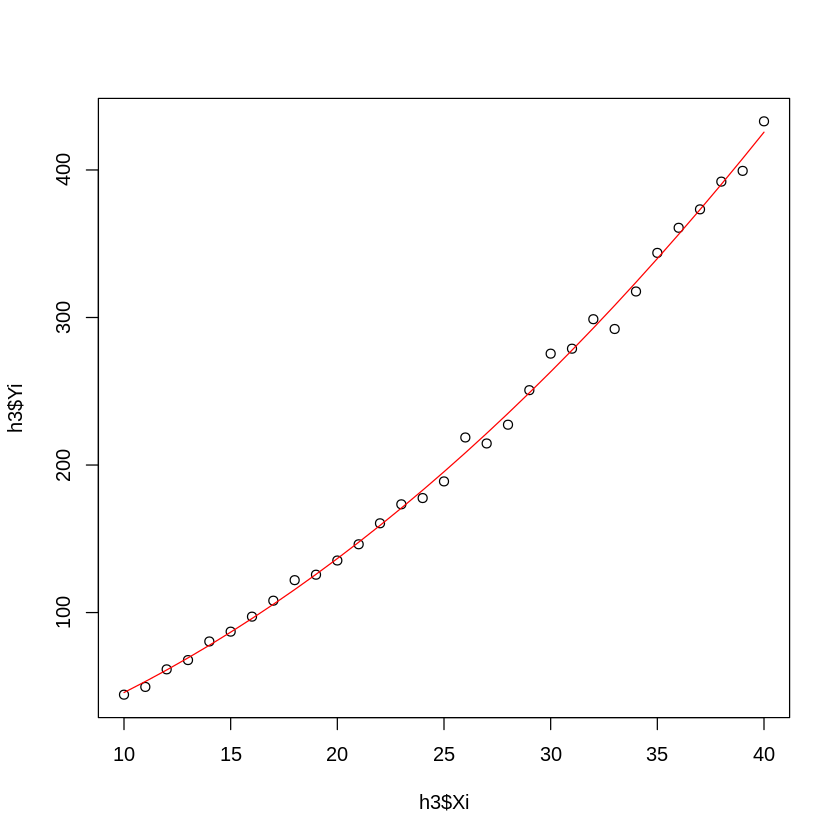

In [110]:
plot(h3$Xi,h3$Yi)
predic_par1 <- predict(par1,newdata=h3)
lines(h3$Xi,predic_par1,col='red')

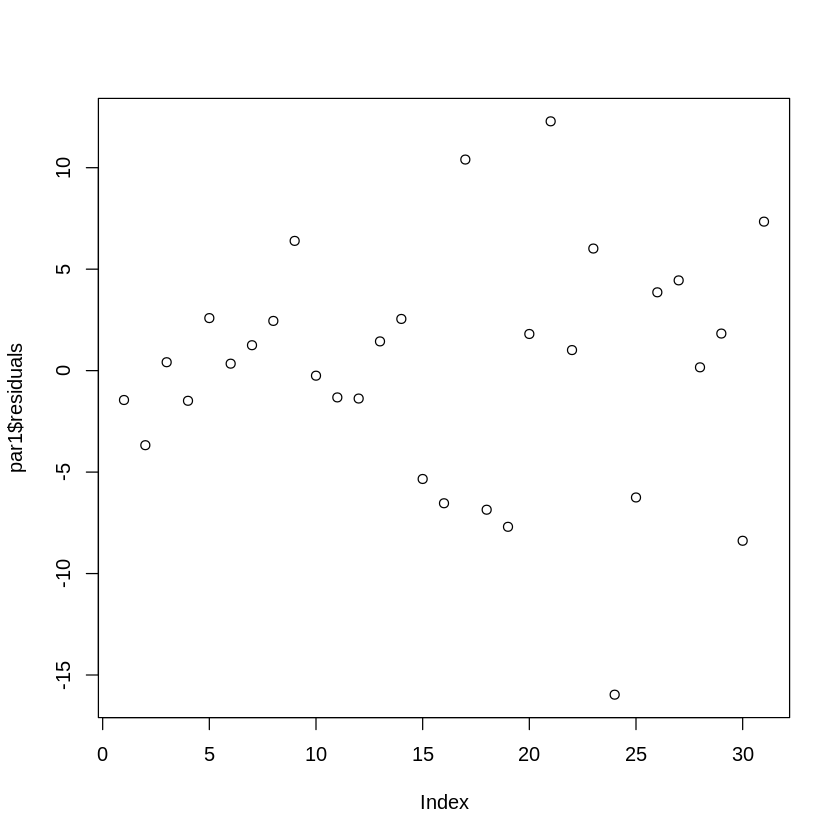

In [111]:
plot(par1$residuals)

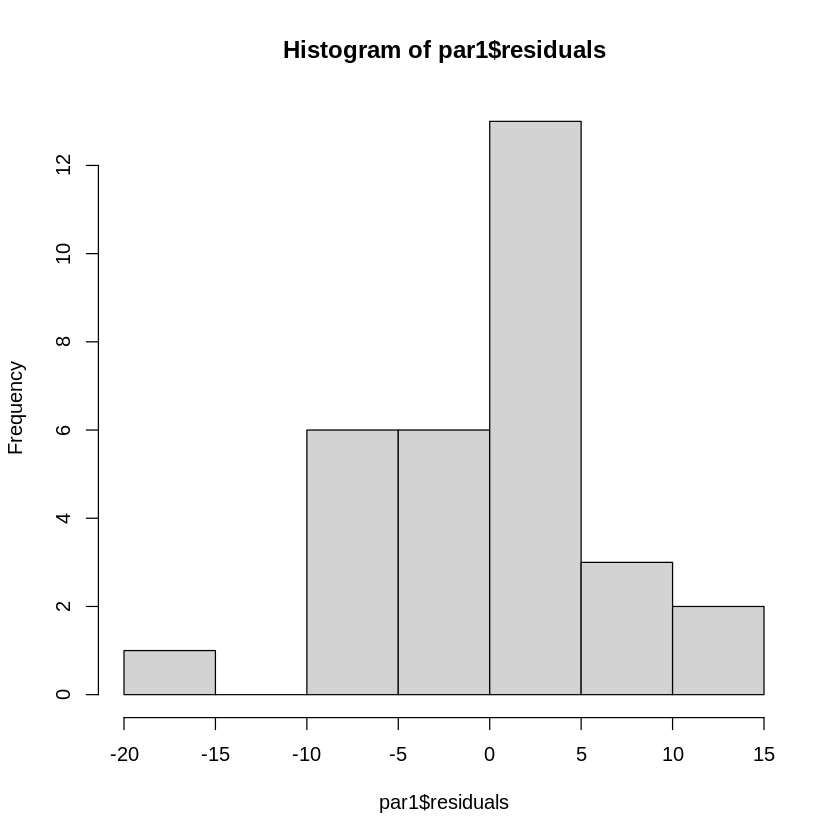

In [112]:
hist(par1$residuals)

# Part 5: using the complete range of our data

Now we will incorporate the full range of our data, fit and compare both of these parabolas in a plot to see actually how good our fit was. We observe that both parabolas resemble each other, and we would get that from observing the coefficients as well. The $R^2$ has an acceptable value (really, a pretty nice one) as well. 

In [113]:
h4 <- read.csv('randomediofinal.csv',sep=';')

In [114]:
h <- rbind(h3,h4)

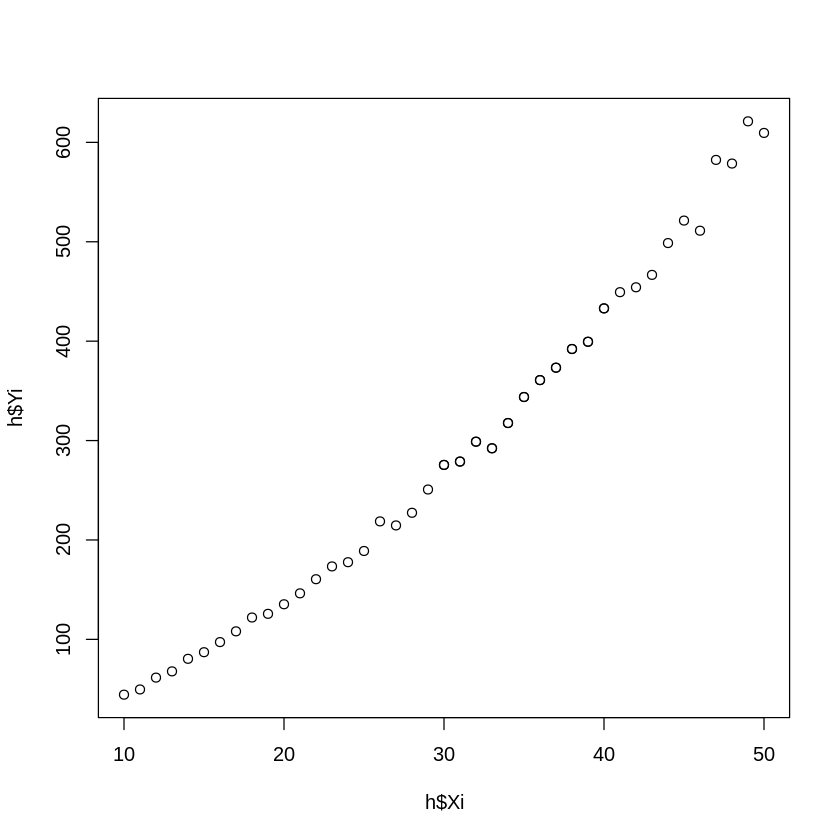

In [115]:
plot(h$Xi,h$Yi)

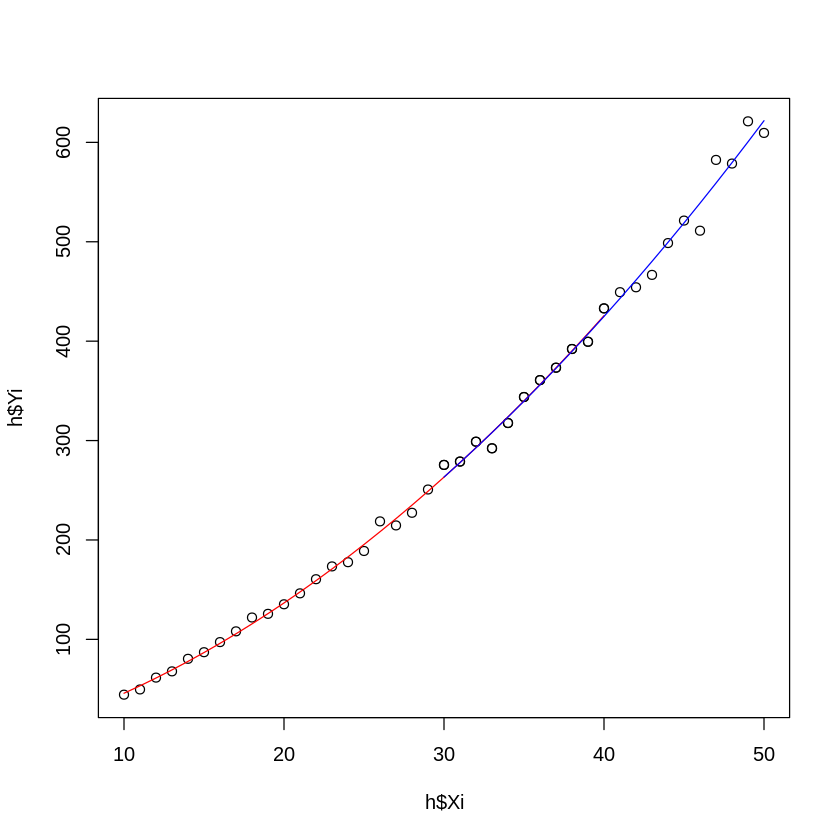

In [116]:
par2 <- lm(data=h,formula='Yi ~ Xi + I(Xi^2)')
predic_par2 <- predict(par2,newdata=h4)
plot(h$Xi,h$Yi)
lines(h3$Xi,predic_par1,col='red')
lines(h4$Xi,predic_par2,col='blue')

In [117]:
summary(par2)


Call:
lm(formula = "Yi ~ Xi + I(Xi^2)", data = h)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.6638  -5.6948   0.8233   4.3126  23.3348 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.11495    8.67515  -1.166    0.249    
Xi            3.82390    0.61910   6.177 1.25e-07 ***
I(Xi^2)       0.17628    0.01024  17.215  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.852 on 49 degrees of freedom
Multiple R-squared:  0.997,	Adjusted R-squared:  0.9968 
F-statistic:  8065 on 2 and 49 DF,  p-value: < 2.2e-16


Let's continue with the analysis of the residuals as before. We again see the error grows with the independent variable $X_i$, there is a functionality that has scaped us in this fits we have done. 

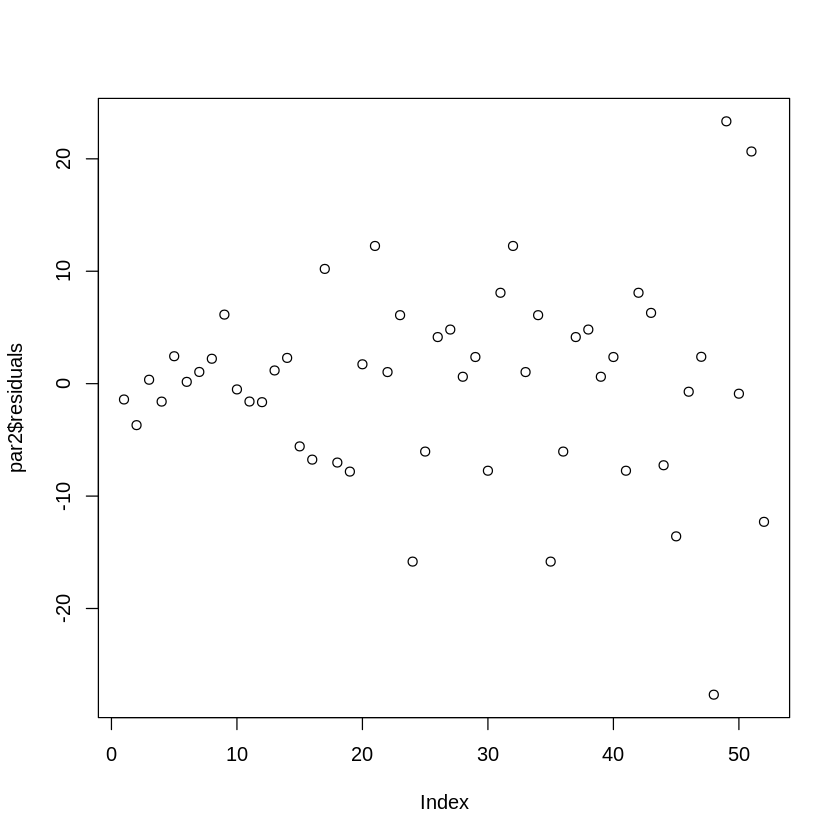

In [118]:
plot(par2$residuals)

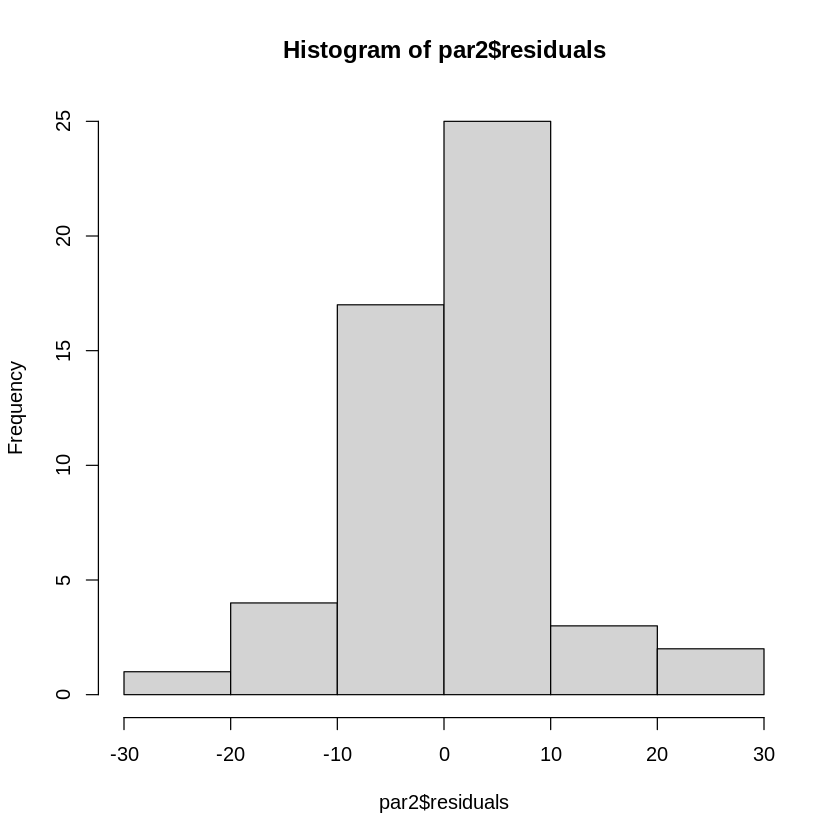

In [119]:
hist(par2$residuals)

# Part 5: Hyperbola data 

We load a new dataset, which we graph and doesn't have anything to do with the old ones. It appears to be more of an hyperbola rather than a line. Therefore, we will learn how to fit an hyperbola to this data. 

For that, we will create a new variable $Y_i = 1/Z_i$ and see if we can fit a line to that. If we can, that means we have an hyperbola on our hands, just following from basic mathematics. 

In [145]:
h5 <- read.csv('hyperbola.csv',sep=';')

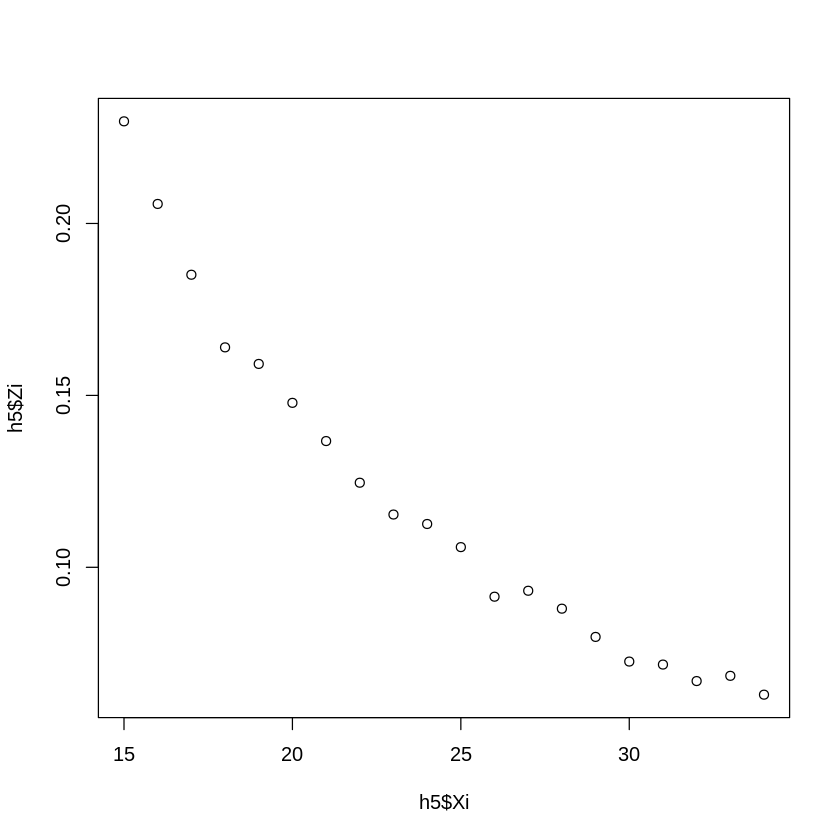

In [146]:
plot(h5$Xi,h5$Zi)

In [147]:
# here we define the inverse of Z_i
Yi <- 1/h5$Zi
#now we glue it to out dataframe
h5 <- cbind(h5,Yi)
#and now we fit our data 
linear_4 <- lm(data=h5,formula='Yi ~ Xi')

In [148]:
summary(linear_4)


Call:
lm(formula = "Yi ~ Xi", data = h5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60182 -0.29701 -0.02482  0.32236  0.67012 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.24418    0.40193  -13.05  1.3e-10 ***
Xi           0.61165    0.01597   38.30  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4118 on 18 degrees of freedom
Multiple R-squared:  0.9879,	Adjusted R-squared:  0.9872 
F-statistic:  1467 on 1 and 18 DF,  p-value: < 2.2e-16


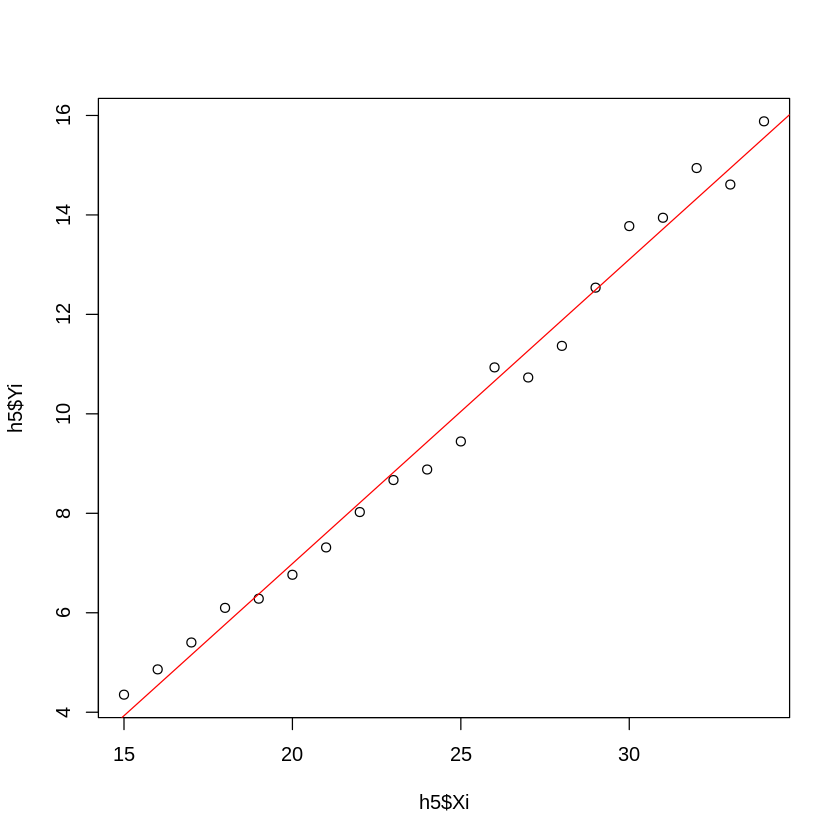

In [149]:
plot(h5$Xi,h5$Yi)
abline(linear_4,col='red')

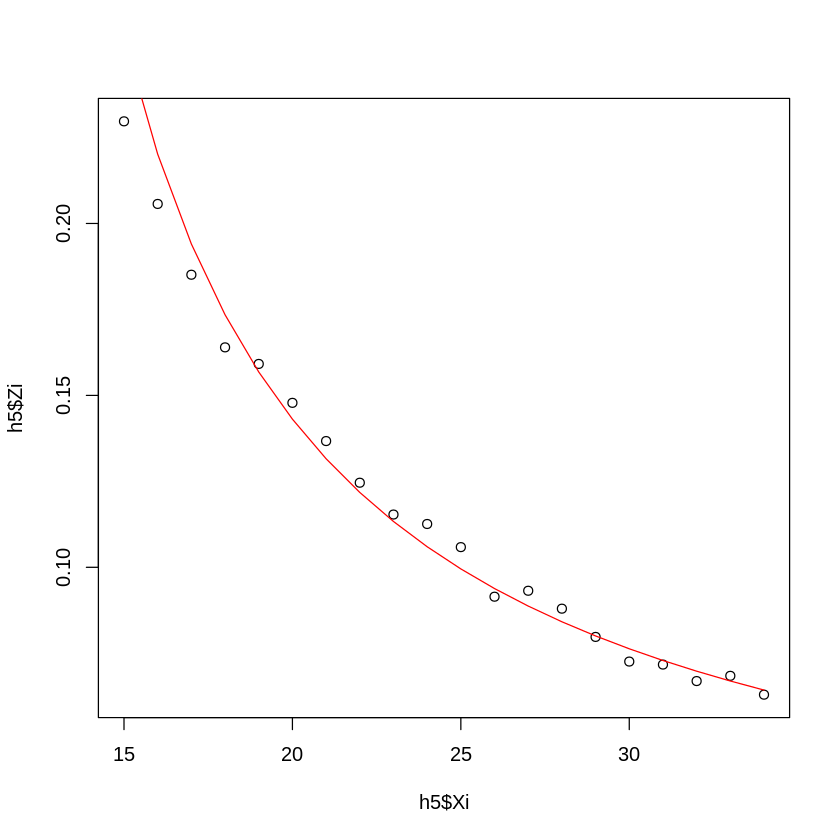

In [155]:
#now we do the supposedly hyperbolic plot
y_pred <- predict(linear_4,newdata=h5)
z_pred <- 1/y_pred
plot(h5$Xi,h5$Zi)
lines(h5$Xi,z_pred,col='red')